# **Viral or Not – Predicting Virality of Tweets**

## Import Required Libraries
This section imports the necessary libraries for data manipulation and visualization.

In [73]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset
Load the dataset containing tweets and display the first few rows.

In [74]:
data = pd.read_csv("Dataset/Tweets.csv")

In [75]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Dataset Information
Get an overview of the dataset structure and data types.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Drop Unnecessary Columns
Remove columns that are not needed for analysis to simplify the dataset.

In [77]:
columns_to_drop = [
    'tweet_id', 
    'airline_sentiment_confidence', 
    'negativereason_confidence', 
    'airline_sentiment_gold', 
    'negativereason_gold', 
    'name', 
    'tweet_coord', 
    'tweet_location', 
    'user_timezone'
]

data.drop(columns=columns_to_drop, inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   negativereason     9178 non-null   object
 2   airline            14640 non-null  object
 3   retweet_count      14640 non-null  int64 
 4   text               14640 non-null  object
 5   tweet_created      14640 non-null  object
dtypes: int64(1), object(5)
memory usage: 686.4+ KB


In [79]:
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,tweet_created
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


## Check Dataset Shape
Display the shape of the dataset to understand its dimensions.

In [80]:
data.shape

(14640, 6)

## Check for Missing Values
Identify any missing values in the dataset.

In [81]:
data.isnull().sum()

airline_sentiment       0
negativereason       5462
airline                 0
retweet_count           0
text                    0
tweet_created           0
dtype: int64

## Fill Missing Values
Fill missing values in the `negativereason` column with 'No Reason'.

In [82]:
data['negativereason'] = data['negativereason'].fillna('No Reason')

In [83]:
data.isnull().sum()

airline_sentiment    0
negativereason       0
airline              0
retweet_count        0
text                 0
tweet_created        0
dtype: int64

In [84]:
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,tweet_created
0,neutral,No Reason,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,No Reason,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,No Reason,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


## Convert Tweet Created to Datetime
Convert the `tweet_created` column to datetime format for easier manipulation.

In [85]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

## Create Engagement Column
Create a new column for engagement based on retweet count.

In [86]:
data['engagement'] = data['retweet_count']

In [87]:
retweet_frequencies = data['retweet_count'].value_counts()
print(retweet_frequencies)



retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64


## Create Viral Column
Define a new column indicating whether a tweet is viral based on engagement.

In [88]:
data['viral'] = (data['engagement'] > 4).astype(int)


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype                    
---  ------             --------------  -----                    
 0   airline_sentiment  14640 non-null  object                   
 1   negativereason     14640 non-null  object                   
 2   airline            14640 non-null  object                   
 3   retweet_count      14640 non-null  int64                    
 4   text               14640 non-null  object                   
 5   tweet_created      14640 non-null  datetime64[ns, UTC-08:00]
 6   engagement         14640 non-null  int64                    
 7   viral              14640 non-null  int32                    
dtypes: datetime64[ns, UTC-08:00](1), int32(1), int64(2), object(4)
memory usage: 857.9+ KB


In [90]:
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,tweet_created,engagement,viral
0,neutral,No Reason,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,0,0
1,positive,No Reason,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,0,0
2,neutral,No Reason,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,0,0
3,negative,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,0,0
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,0,0


## Create Tweet Hour Column
Extract the hour from the `tweet_created` column for analysis.

In [91]:
# Create a new column for the hour of the tweet
data['tweet_hour'] = data['tweet_created'].dt.hour

## Calculate Tweets Per Hour
Count the number of tweets per hour and display the results.

In [92]:
# Calculate the number of tweets per hour
tweets_per_hour = data['tweet_hour'].value_counts().sort_index()

# Print the results
print("Tweets per hour:")
print(tweets_per_hour)

Tweets per hour:
tweet_hour
0      131
1      111
2      174
3      225
4      368
5      477
6      621
7      776
8      926
9     1013
10     962
11     986
12     824
13     900
14     927
15     788
16     734
17     754
18     751
19     675
20     602
21     430
22     292
23     193
Name: count, dtype: int64


## Plot Tweets Per Hour
Visualize the number of tweets per hour using a bar chart.

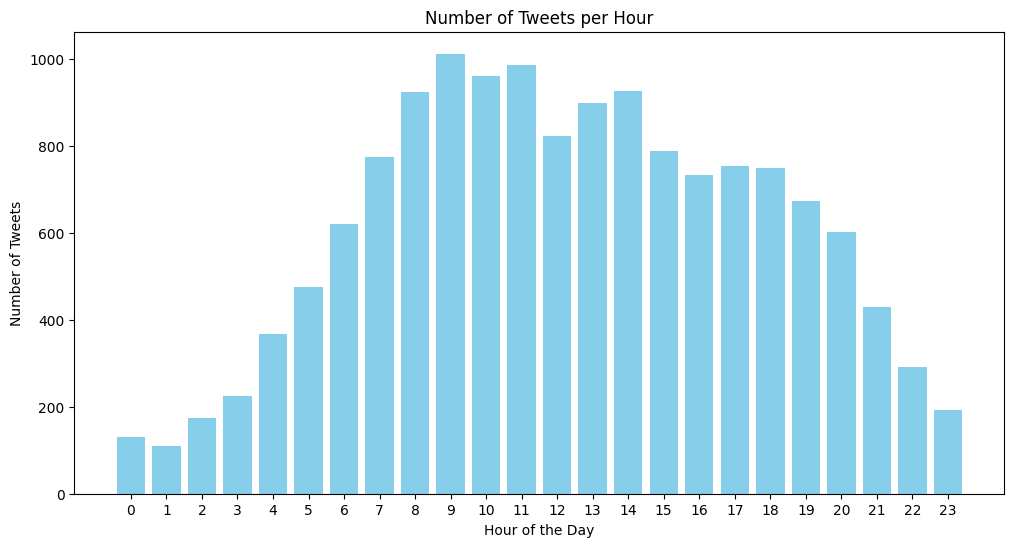

In [93]:
# Plotting tweets per hour
plt.figure(figsize=(12, 6))
plt.bar(tweets_per_hour.index, tweets_per_hour.values, color='skyblue')
plt.title('Number of Tweets per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=tweets_per_hour.index, labels=[f'{hour}' for hour in tweets_per_hour.index])
plt.show()

## Create Tweet Day of Week Column
Extract the day of the week from the `tweet_created` column.

In [94]:
# Create a new column for the day of the week (0=Monday, 6=Sunday)
data['tweet_day_of_week'] = data['tweet_created'].dt.dayofweek

## Calculate Tweets Per Day
Count the number of tweets per day of the week and display the results.

In [95]:
# Calculate the number of tweets per day of the week
tweets_per_day = data['tweet_day_of_week'].value_counts().sort_index()

print("\nTweets per day of the week:")
print(tweets_per_day)


Tweets per day of the week:
tweet_day_of_week
0    3032
1    2752
2    1344
3    1376
4    1500
5    1557
6    3079
Name: count, dtype: int64


## Plot Tweets Per Day
Visualize the number of tweets per day of the week using a bar chart.

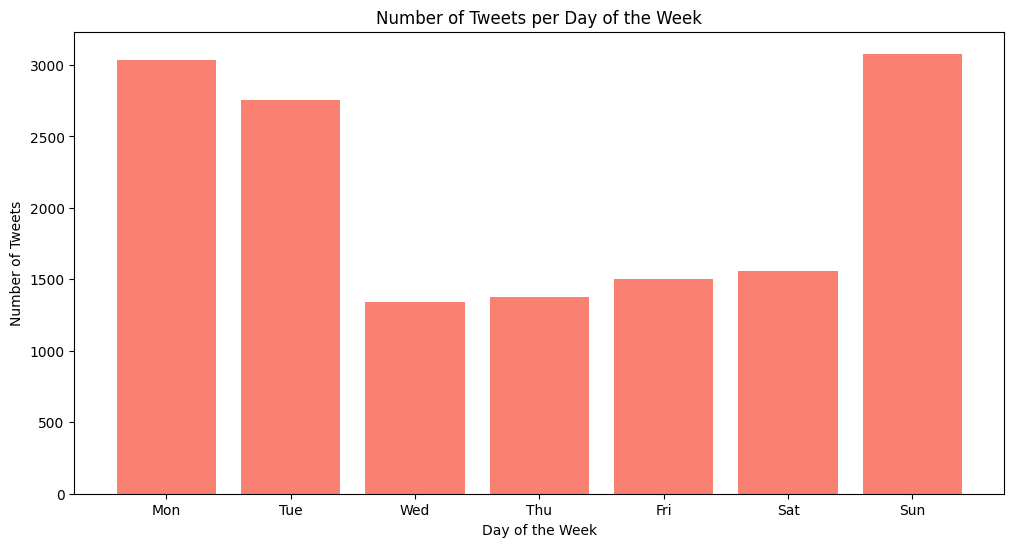

In [96]:
# Plotting tweets per day of the week
plt.figure(figsize=(12, 6))
plt.bar(tweets_per_day.index, tweets_per_day.values, color='salmon')
plt.title('Number of Tweets per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=tweets_per_day.index, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


## Calculate Average Engagement Per Hour
Compute the average engagement per hour and display the results.

In [97]:
# Calculate the average engagement per hour
average_engagement_per_hour = data.groupby('tweet_hour')['engagement'].mean()

# Print the results
print("Average engagement per hour:")
print(average_engagement_per_hour)

Average engagement per hour:
tweet_hour
0     0.007634
1     0.081081
2     0.045977
3     0.040000
4     0.051630
5     0.031447
6     0.028986
7     0.039948
8     0.050756
9     0.044423
10    0.132017
11    0.118661
12    0.121359
13    0.080000
14    0.063646
15    0.081218
16    0.094005
17    0.086207
18    0.102530
19    0.121481
20    0.204319
21    0.046512
22    0.071918
23    0.062176
Name: engagement, dtype: float64


## Plot Average Engagement Per Hour
Visualize the average engagement per hour using a line plot.

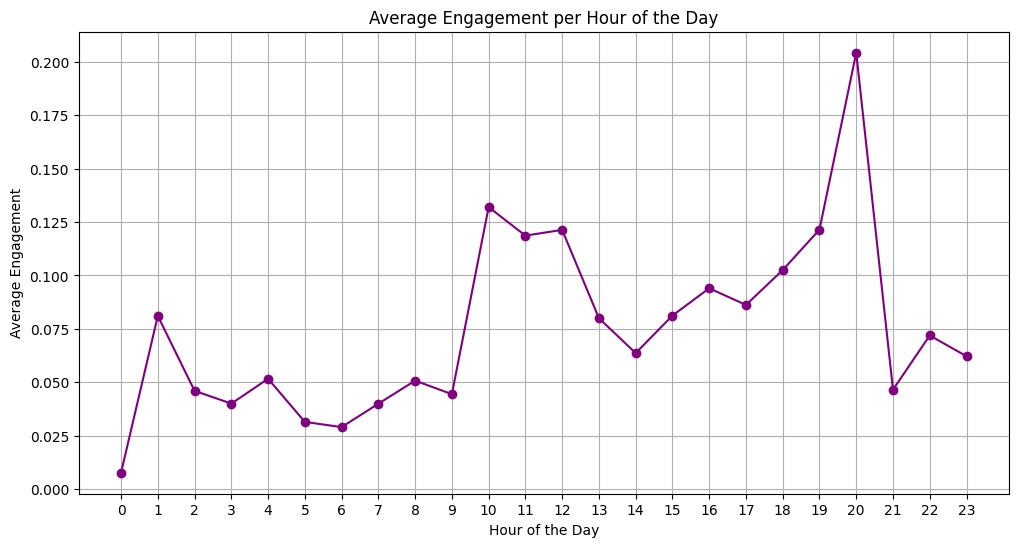

In [99]:
# Plotting average engagement per hour
plt.figure(figsize=(12, 6))
plt.plot(average_engagement_per_hour.index, average_engagement_per_hour.values, marker='o', color='purple')
plt.title('Average Engagement per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.xticks(ticks=average_engagement_per_hour.index, labels=[f'{hour}' for hour in average_engagement_per_hour.index])
plt.grid()
plt.show()